In [229]:
import pandas as pd
import re
from datetime import time
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("paper", font_scale=2.0)

In [230]:
data = pd.read_csv("time.summary", sep="\t")
# filter out times under 1 second
data = data[~data.time.str.startswith("0:00")]
# removes milliseconds when present
data.time = data.time.transform(lambda x: re.sub(r"\..*", "", str(x)))
# add hour when missing
data.time = data.time.transform(lambda x: "0:" + x if len(x.split(":")) == 2 else x)
data.time = data.time.transform(lambda x: pd.to_timedelta(x))
data.head()

,cpus,neoantigens,replica,time
0,10,1000,0,0 days 00:35:35
1,10,1000,1,0 days 00:26:42
2,10,1000,2,0 days 00:26:43
3,10,1000,3,0 days 00:26:29
4,10,1000,4,0 days 00:26:40


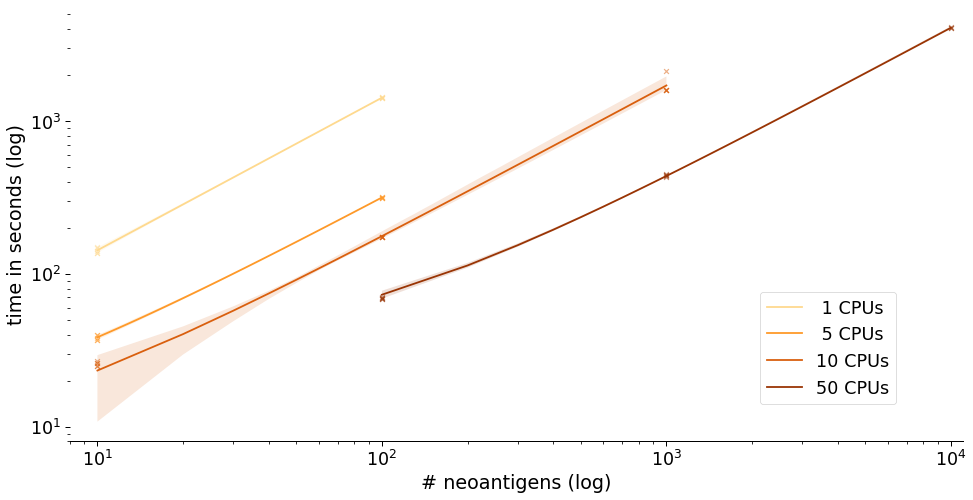

In [231]:
fig = plt.figure(figsize=(16,8))

scatter_kws={"alpha": 0.5, "marker":"+"}
ax = sns.regplot(x=data[data.cpus == 1].neoantigens, y=data[data.cpus == 1].time.astype('timedelta64[s]'), marker="x", scatter_kws=scatter_kws, color="#fed98e")
sns.regplot(x=data[data.cpus == 5].neoantigens, y=data[data.cpus == 5].time.astype('timedelta64[s]'), marker="x", scatter_kws=scatter_kws, color="#fe9929")
sns.regplot(x=data[data.cpus == 10].neoantigens, y=data[data.cpus == 10].time.astype('timedelta64[s]'), marker="x", scatter_kws=scatter_kws, color="#d95f0e")
sns.regplot(x=data[data.cpus == 50].neoantigens, y=data[data.cpus == 50].time.astype('timedelta64[s]'), marker="x", scatter_kws=scatter_kws, color="#993404")

sns.despine(left=True)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("# neoantigens (log)")
ax.set_ylabel("time in seconds (log)")
ax.set_xlim([8, 11000])
fig.legend(labels=[' 1 CPUs', ' 5 CPUs','10 CPUs', '50 CPUs'], loc='upper right',  bbox_to_anchor=(0.35, -0.1, 0.5, 0.5))
plt.savefig("performance_time_1.jpg", dpi=200)

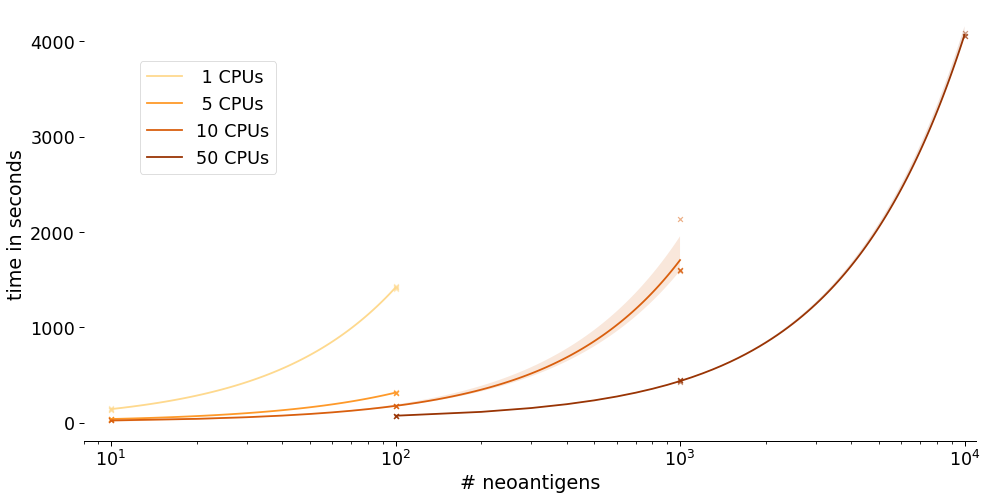

In [232]:
fig = plt.figure(figsize=(16,8))

scatter_kws={"alpha": 0.5, "marker":"+"}
ax = sns.regplot(x=data[data.cpus == 1].neoantigens, y=data[data.cpus == 1].time.astype('timedelta64[s]'), marker="x", scatter_kws=scatter_kws, color="#fed98e")
sns.regplot(x=data[data.cpus == 5].neoantigens, y=data[data.cpus == 5].time.astype('timedelta64[s]'), marker="x", scatter_kws=scatter_kws, color="#fe9929")
sns.regplot(x=data[data.cpus == 10].neoantigens, y=data[data.cpus == 10].time.astype('timedelta64[s]'), marker="x", scatter_kws=scatter_kws, color="#d95f0e")
sns.regplot(x=data[data.cpus == 50].neoantigens, y=data[data.cpus == 50].time.astype('timedelta64[s]'), marker="x", scatter_kws=scatter_kws, color="#993404")

sns.despine(left=True)
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel("# neoantigens")
ax.set_ylabel("time in seconds")
ax.set_xlim([8, 11000])
fig.legend(labels=[' 1 CPUs', ' 5 CPUs','10 CPUs', '50 CPUs'], loc='upper right',  bbox_to_anchor=(-0.2, 0.3, 0.5, 0.5))
plt.savefig("performance_time_2.jpg", dpi=200)

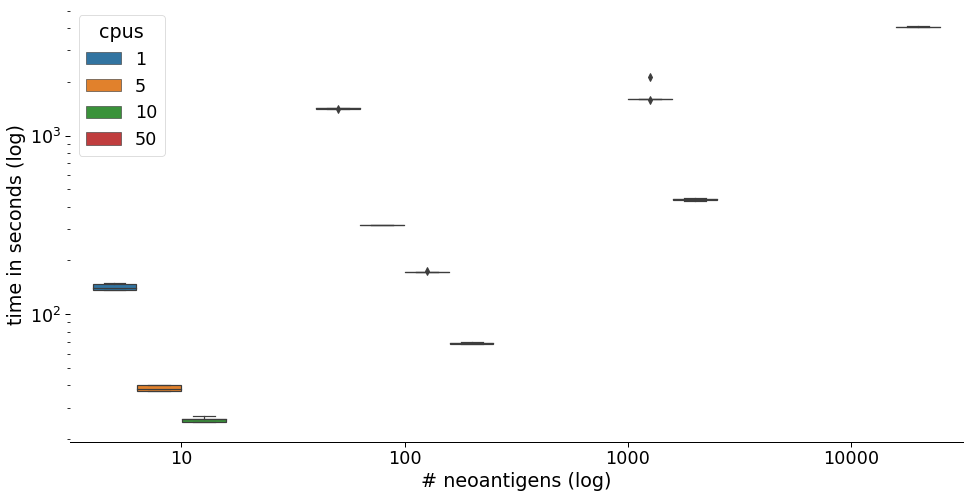

In [233]:
fig = plt.figure(figsize=(16,8))

scatter_kws={"alpha": 0.5, "marker":"+"}
ax = sns.boxplot(x=data.neoantigens, y=data.time.astype('timedelta64[s]'), hue=data.cpus)
#sns.boxplot(x=data[data.cpus == 5].neoantigens, y=data[data.cpus == 5].time.astype('timedelta64[s]'), color="#fe9929")
#sns.boxplot(x=data[data.cpus == 10].neoantigens, y=data[data.cpus == 10].time.astype('timedelta64[s]'), color="#d95f0e")
#sns.boxplot(x=data[data.cpus == 50].neoantigens, y=data[data.cpus == 50].time.astype('timedelta64[s]'), color="#993404")

sns.despine(left=True)
#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("# neoantigens (log)")
ax.set_ylabel("time in seconds (log)")
#ax.set_xlim([8, 11000])
#fig.legend(labels=[' 1 CPUs', ' 5 CPUs','10 CPUs', '50 CPUs'], loc='upper right',  bbox_to_anchor=(0.35, -0.1, 0.5, 0.5))
plt.savefig("performance_time_3.jpg", dpi=200)

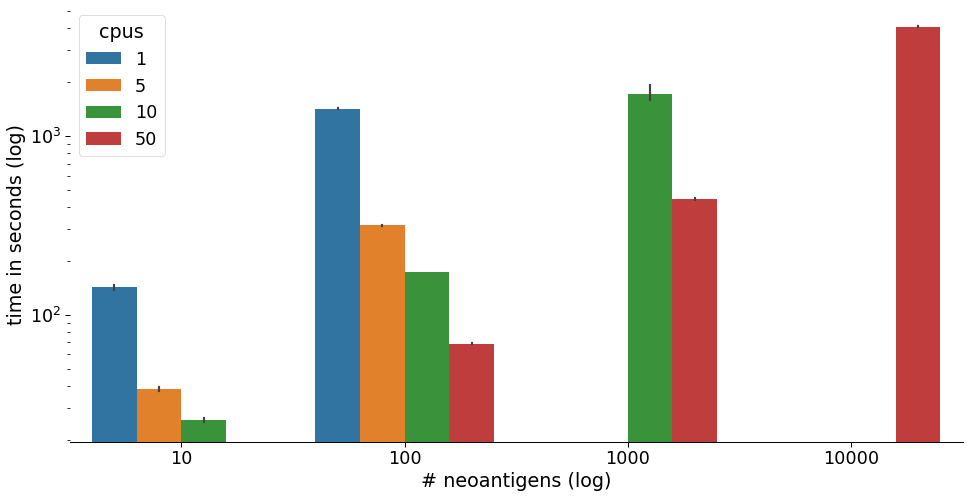

In [234]:
fig = plt.figure(figsize=(16,8))

scatter_kws={"alpha": 0.5, "marker":"+"}
ax = sns.barplot(x=data.neoantigens, y=data.time.astype('timedelta64[s]'), hue=data.cpus)
#sns.boxplot(x=data[data.cpus == 5].neoantigens, y=data[data.cpus == 5].time.astype('timedelta64[s]'), color="#fe9929")
#sns.boxplot(x=data[data.cpus == 10].neoantigens, y=data[data.cpus == 10].time.astype('timedelta64[s]'), color="#d95f0e")
#sns.boxplot(x=data[data.cpus == 50].neoantigens, y=data[data.cpus == 50].time.astype('timedelta64[s]'), color="#993404")

sns.despine(left=True)
#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("# neoantigens (log)")
ax.set_ylabel("time in seconds (log)")
#ax.set_xlim([8, 11000])
#fig.legend(labels=[' 1 CPUs', ' 5 CPUs','10 CPUs', '50 CPUs'], loc='upper right',  bbox_to_anchor=(0.35, -0.1, 0.5, 0.5))
plt.savefig("performance_time_3.jpg", dpi=200)

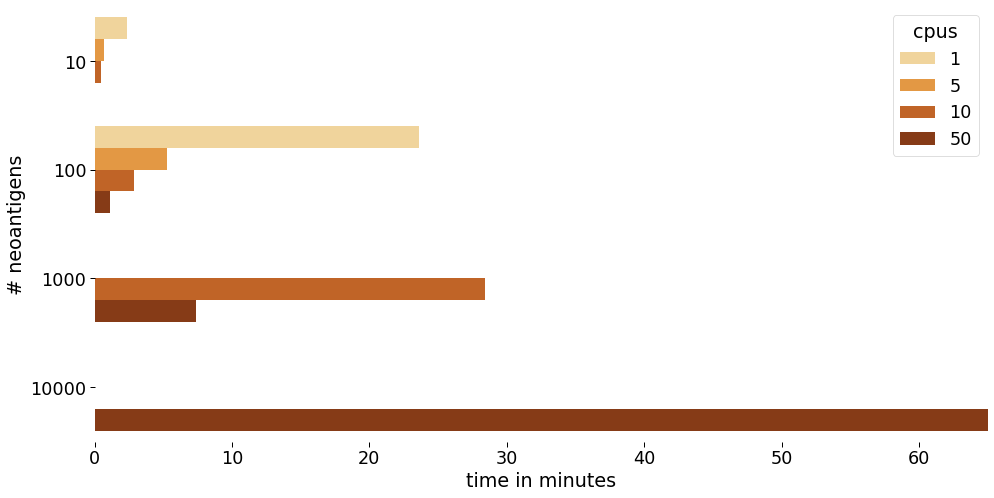

In [235]:
fig = plt.figure(figsize=(16,8))

scatter_kws={"alpha": 0.5, "marker":"+"}
ax = sns.barplot(y=data.neoantigens, x=data.time.transform(lambda d: float(d.total_seconds()) / 60), hue=data.cpus, 
                 orient="h", errwidth=0.0, palette=["#fed98e","#fe9929","#d95f0e","#993404"])


sns.despine(left=True, bottom=True)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel("# neoantigens")
ax.set_xlabel("time in minutes")
ax.set_xlim([0, 65])
plt.savefig("performance_time_4.jpg", dpi=200)

In [238]:
data2 = pd.read_csv("memory.summary", sep="\t") #, names=["cpus", "neoantigens", "replica", "size"])
# add hour when missing
data2.head()

,cpus,neoantigens,replica,kilobytes
0,10,1000,0,381968
1,10,1000,1,371160
2,10,1000,2,369840
3,10,1000,3,369572
4,10,1000,4,370136


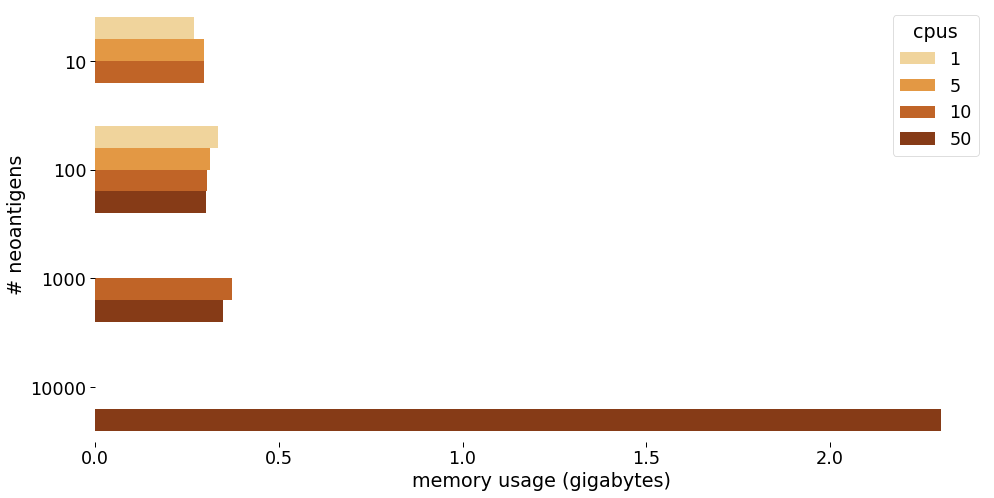

In [240]:
fig = plt.figure(figsize=(16,8))

#.transform(lambda d: float(d.total_seconds()) / 60)
scatter_kws={"alpha": 0.5, "marker":"+"}
ax = sns.barplot(y=data2.neoantigens, x=data2.kilobytes.transform(lambda d: float(d) / 1000000), hue=data2.cpus, 
                 orient="h", errwidth=0.0, palette=["#fed98e","#fe9929","#d95f0e","#993404"])


sns.despine(left=True, bottom=True)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel("# neoantigens")
ax.set_xlabel("memory usage (gigabytes)")
#ax.set_xlim([0, 65])
plt.savefig("performance_memory_1.jpg", dpi=200)

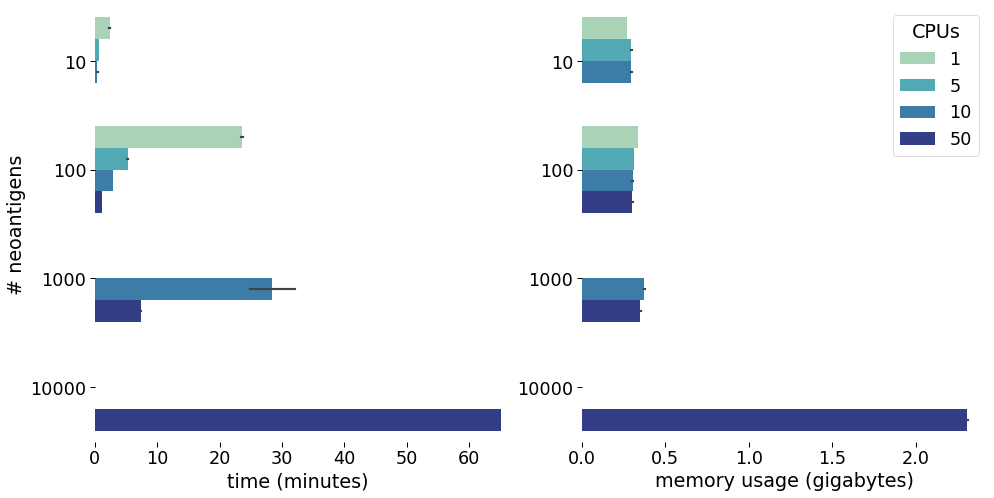

In [261]:
fig, axs = plt.subplots(ncols=2, figsize=(16,8))
colors = ["#a1dab4", "#41b6c4", "#2c7fb8", "#253494"]


scatter_kws={"alpha": 0.5, "marker":"+"}
ax = sns.barplot(y=data.neoantigens, x=data.time.transform(lambda d: float(d.total_seconds()) / 60), hue=data.cpus, 
                 orient="h", palette=colors, ax=axs[0], ci="sd")  # errwidth=0.0
axs[0].set_ylabel("# neoantigens")
axs[0].set_xlabel("time (minutes)")
axs[0].set_xlim([0, 65])
axs[0].get_legend().remove()

scatter_kws={"alpha": 0.5, "marker":"+"}
sns.barplot(y=data2.neoantigens, x=data2.kilobytes.transform(lambda d: float(d) / 1000000), hue=data2.cpus, 
                 orient="h", palette=colors, ax=axs[1])  # errwidth=0.0,
axs[1].set_ylabel(None)
axs[1].set_xlabel("memory usage (gigabytes)")
axs[1].legend().set_title("CPUs")
#axs[1].legend().set_frame_on(False)
#axs[1].legend().set_labels([" 1 CPU", " 5 CPUs", " 10 CPUs", " 50 CPUs"])


#fig.legend(labels=[' 1 CPU', ' 5 CPUs','10 CPUs', '50 CPUs'], colors=["#fed98e","#fe9929","#d95f0e","#993404"], loc='upper right',  bbox_to_anchor=(0.35, -0.1, 0.5, 0.5))
sns.despine(left=True, bottom=True)

plt.savefig("performance_1.jpg", dpi=200)

In [256]:
average_times = data.time.transform(lambda d: d.total_seconds()) / (data.neoantigens / data.cpus)
average_times #[average_times < 10]

0     21.35
1     16.02
2     16.03
3     15.89
4     16.00
5     17.30
6     17.30
7     17.30
8     17.50
9     17.30
10    27.00
11    25.00
12    26.00
13    26.00
14    25.00
15    14.17
16    14.23
17    14.02
18    14.29
19    14.20
20    14.80
21    14.00
22    15.00
23    13.70
24    13.70
25    20.26
26    20.46
27    20.30
28    22.45
29    22.15
30    22.20
31    21.80
32    21.55
33    34.50
34    34.50
35    34.00
36    35.00
37    34.00
38    15.80
39    15.75
40    15.70
41    15.90
42    15.70
43    20.00
44    19.00
45    20.00
46    18.50
47    18.50
dtype: float64

In [259]:
average_times.mean()

20.023333333333333

In [260]:
average_times.std()

6.12524470491061

In [247]:
data

,cpus,neoantigens,replica,time
0,10,1000,0,0 days 00:35:35
1,10,1000,1,0 days 00:26:42
2,10,1000,2,0 days 00:26:43
3,10,1000,3,0 days 00:26:29
4,10,1000,4,0 days 00:26:40
5,10,100,0,0 days 00:02:53
6,10,100,1,0 days 00:02:53
7,10,100,2,0 days 00:02:53
8,10,100,3,0 days 00:02:55
9,10,100,4,0 days 00:02:53
